In [109]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [110]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('Student Attitude and Behavior.csv')

In [111]:
df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No


In [112]:
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [113]:
print(df.columns)


Index(['Certification Course', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time', 'prefer to study in', 'salary expectation',
       'Do you like your degree?',
       'willingness to pursue a career based on their degree  ',
       'social medai & video', 'Travelling Time ', 'Stress Level ',
       'Financial Status', 'part-time job'],
      dtype='object')


In [114]:
df.rename(columns={'daily studing time': 'daily studying time'}, inplace=True)


In [115]:
# 결측치 확인
print(df.isnull().sum())

# 결측치가 있는 경우 처리 (임의로 삭제)
df = df.dropna()

# 결측치 처리 후 데이터 확인
print(df.isnull().sum())


Certification Course                                      0
Gender                                                    0
Department                                                0
Height(CM)                                                0
Weight(KG)                                                0
10th Mark                                                 0
12th Mark                                                 0
college mark                                              0
hobbies                                                   0
daily studying time                                       0
prefer to study in                                        0
salary expectation                                        0
Do you like your degree?                                  0
willingness to pursue a career based on their degree      0
social medai & video                                      0
Travelling Time                                           0
Stress Level                            

#### 대학 성적(`college mark`)과 일일 공부 시간(`daily studying time`)의 관계를 탐구하여 두 변수 간의 상관관계 및 패턴을 파악

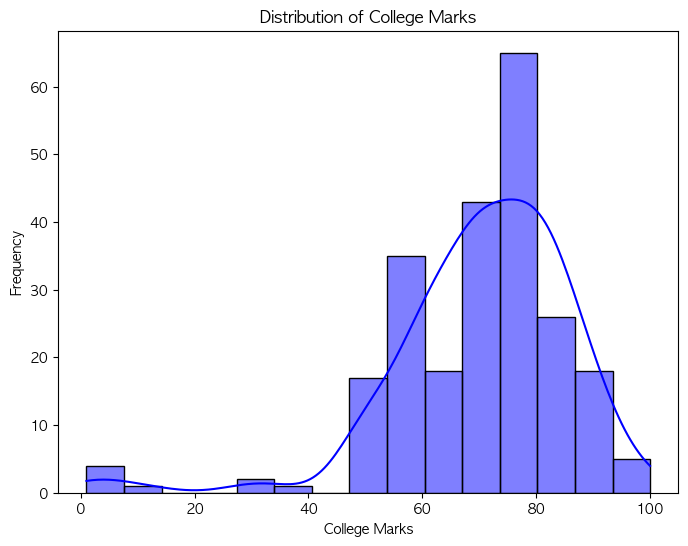

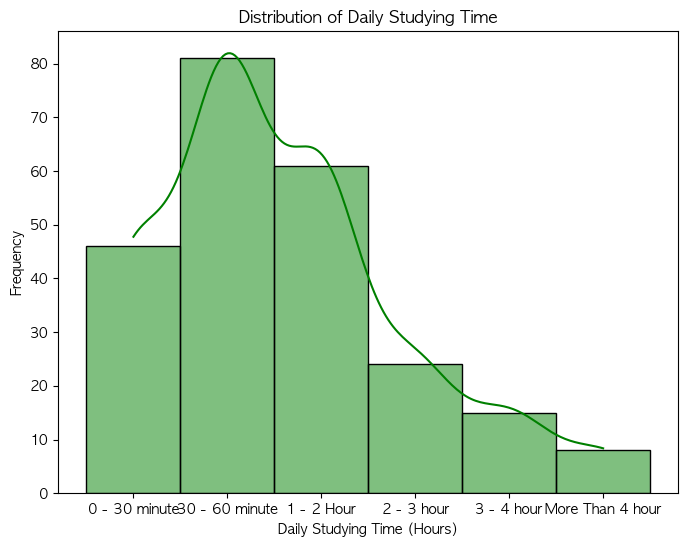

In [117]:

# Distribution of college marks
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='college mark', kde=True, color='blue', bins=15)
plt.title('Distribution of College Marks')
plt.xlabel('College Marks')
plt.ylabel('Frequency')
plt.show()

# 일일 공부시간 분포
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='daily studying time', kde=True, color='green', bins=10)
plt.title('Distribution of Daily Studying Time')
plt.xlabel('Daily Studying Time (Hours)')
plt.ylabel('Frequency')
plt.show()

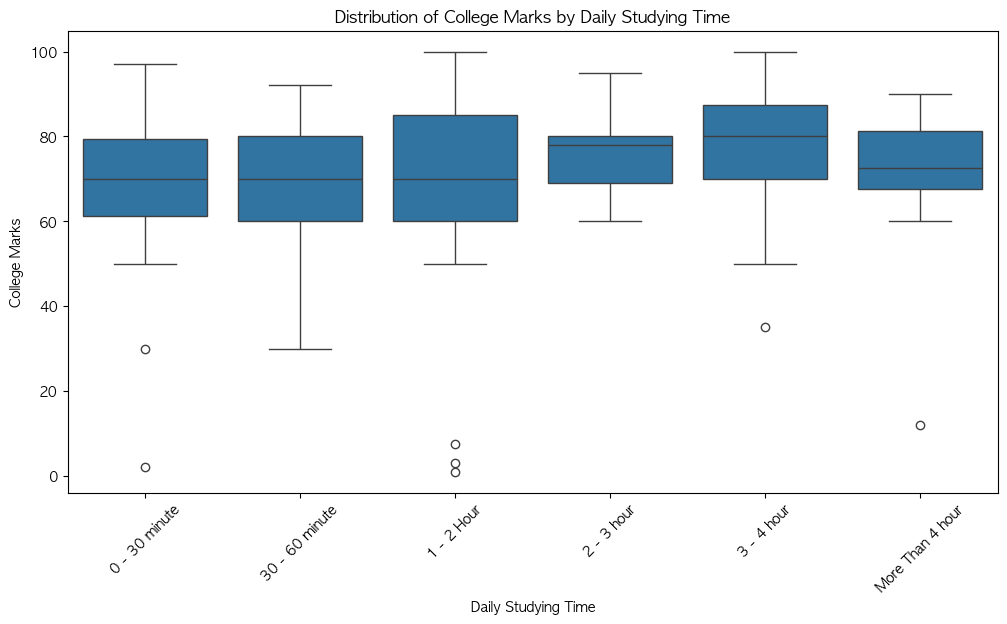

In [118]:
# 전체 대학 성적의 분포를 플롯으로 표현
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='daily studying time', y='college mark')
plt.title('Distribution of College Marks by Daily Studying Time')
plt.xlabel('Daily Studying Time')
plt.ylabel('College Marks')
plt.xticks(rotation=45)
plt.show()

boxplot의 이상치를 제거하지 않은 이유? -> 이 데이터셋의 경우, 이상치는 오히려 해당 범주 내에서 현실적으로 존재할 수 있는 극단적 사례를 보여주므로 함부로 제거하지 않았다. 예를 들어, "4hour" 그룹에서 매우 낮은 성적을 받은 학생은 단순히 이상한 값이 아니라, 많은 시간을 투자했음에도 불구하고 원하는 성취를 얻지 못한 특이한 사례일 수 있기 때문이다

In [116]:
# 공부시간에 따라 그룹화
grouped_counts = df.groupby('daily studying time')['college mark'].count().reset_index()

grouped_counts


,daily studying time,college mark
0,0 - 30 minute,46
1,1 - 2 Hour,61
2,2 - 3 hour,24
3,3 - 4 hour,15
4,30 - 60 minute,81
5,More Than 4 hour,8


데이터셋에 정확한 시간으로 나와있는 것이 아닌 구간 단위로 나와있어 정규성 검정이 어려움. 이미 그룹화된 형태의 범주형 독립변수(공부시간 구간)에 대해 비모수 검정을 시도하였다. 이를 위해 Kruskal-Wallis 검정을 통해 여러 집단 간 중앙값 차이를 검정하는 방법을 사용하였다.

In [121]:
import pandas as pd
import numpy as np
import scipy.stats as stats
# daily studying time 컬럼에 이미 그룹을 나타내는 카테고리(예: '0 - 30 minute', '30 - 60 minute', ...)가 있다고 가정
# 그룹명 추출
groups = df['daily studying time'].unique()

# 각 그룹별 college mark 데이터 추출 (NaN 제거)
group_data = [df.loc[df['daily studying time'] == g, 'college mark'].dropna() for g in groups]

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*group_data)

print("Kruskal-Wallis Test 결과:")
print(f"H-statistic = {stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 있습니다.")
else:
    print("유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 없다고 볼 수 있습니다.")


Kruskal-Wallis Test 결과:
H-statistic = 8.0479, p-value = 0.1536
유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 없다고 볼 수 있습니다.


p-value가 0.05를 초과해 통계적 유의성이 없어 보인다고 해석할 수 있다. 이 결과를 통해 단일 변수(일일 공부시간)로는 성적 차이를 충분히 설명하기 어렵다는 시사점이며, 이는 곧 다른 변수를 종합적으로 고려하는 다변량적 접근이 필요함을 알리는 신호로 해석할 수 있다.